# Library Loading

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preping

In [4]:
data = pd.read_csv('../data/train_qso_wo_image.csv')
df_test = pd.read_csv('../data/train_qso_wo_image.csv')

## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']])
data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']] = s.transform(data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']])

## Train Test Split

In [6]:
X = data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']]

y = data['class_bin']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

# Models: Random Forest Classifier

## 1. With Bayesian Optimization (No Faint Galaxy Contamination)

In [10]:
model = pickle.load(open('rfc_bayesian_wo_galaxy.sav','rb'))
predictionforest = model.predict(X_test)

### Parameters

In [19]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=1200.0, min_samples_leaf=0.0065549028308601945,
                       min_samples_split=0.00623466777332644, n_estimators=50)>

### Metrics

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, predictionforest))
print("Precision:",metrics.precision_score(y_test, predictionforest))
print('F1:', metrics.f1_score(y_test,predictionforest))
print("recall:",metrics.recall_score(y_test, predictionforest))

Accuracy: 0.9230769230769231
Precision: 0.9629629629629629
F1: 0.9454545454545454
recall: 0.9285714285714286


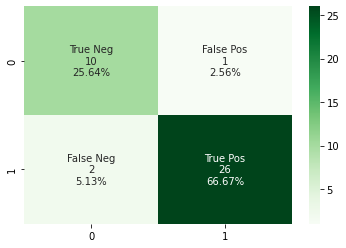

In [33]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictionforest)
cf_matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.savefig('../figures/rfc_p_cf_matrix')

### Tree visualization

In [25]:
#picking one tree from the clf model
estimator = model.estimators_[3]

target_names = ['non_quasar','quasars']

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## 2. With Bayesian Opt (Faint Galaxy included)

In [45]:
model = pickle.load(open('rfc_bayesian.sav','rb'))
predictionforest = model.predict(X_test)

### Parameters

In [46]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=1190.0,
                       min_samples_leaf=0.007703171100191995,
                       min_samples_split=0.01102436104457952, n_estimators=50)>

### Metrics

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, predictionforest))
print("Precision:",metrics.precision_score(y_test, predictionforest))
print('F1:', metrics.f1_score(y_test,predictionforest))
print("recall:",metrics.recall_score(y_test, predictionforest))

Accuracy: 0.7435897435897436
Precision: 0.875
F1: 0.8076923076923077
recall: 0.75


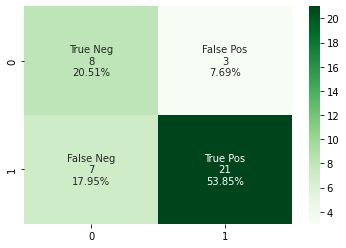

In [48]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictionforest)
cf_matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.savefig('../figures/rfc_p_cf_matrix')

In [49]:
#generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
#prodict probability
clf_prob = model.predict_proba(X_test)
# keep probabilities for the positive outcome only/
clf_prob = clf_prob[:, 1]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, ns_prob)
lr_auc = roc_auc_score(y_test, clf_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.834


### Tree visualization

In [25]:
#picking one tree from the clf model
estimator = model.estimators_[3]

target_names = ['non_quasar','quasars']

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')